<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>BASIC PLOTS</font></h1>

<hr>




## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><p><a href="#ref0">Introduction</a></p></li>
<li><p><a href="#ref1">Scatter plot</a></p></li>
<li><p><a href="#ref2">Line Graph</a></p></li>
<li style="margin-left: 40px;"><p><a href="#ref3">Simple Line Graph</a></p></li>
<li style="margin-left: 40px;"><p><a href="#ref4">Regression</a></p></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>

<a id="ref0"></a>
<h2 align=center>Introduction</h2>

Data visualization is the presentation of data with graphics. It's a way to summarize your findings and display it in a form that facilitates interpretation and can help in identifying patterns or trends.
Having great data visualizations will make your work more interesting and clear.
In this notebook you will learn how to create Scatterplots and Line Graphs.

<hr>

<a id="ref1"></a>
<h2 align=center>Scatterplot</h2>

A scatter plot uses points and Cartesian coordinates to display the position of values between two or more variables. It is possible to plot scatter plots in 2D and 3D.

Let's start importing the `ggplot2` library.

In [1]:
if("ggplot2" %in% rownames(installed.packages()) == FALSE) {install.packages("ggplot2")}
library(ggplot2)

We can create a very simple 2D scatterplot simply using qplot. Using two variables as parameters makes a scatterplot by default.Here we are using the mtcars dataset.

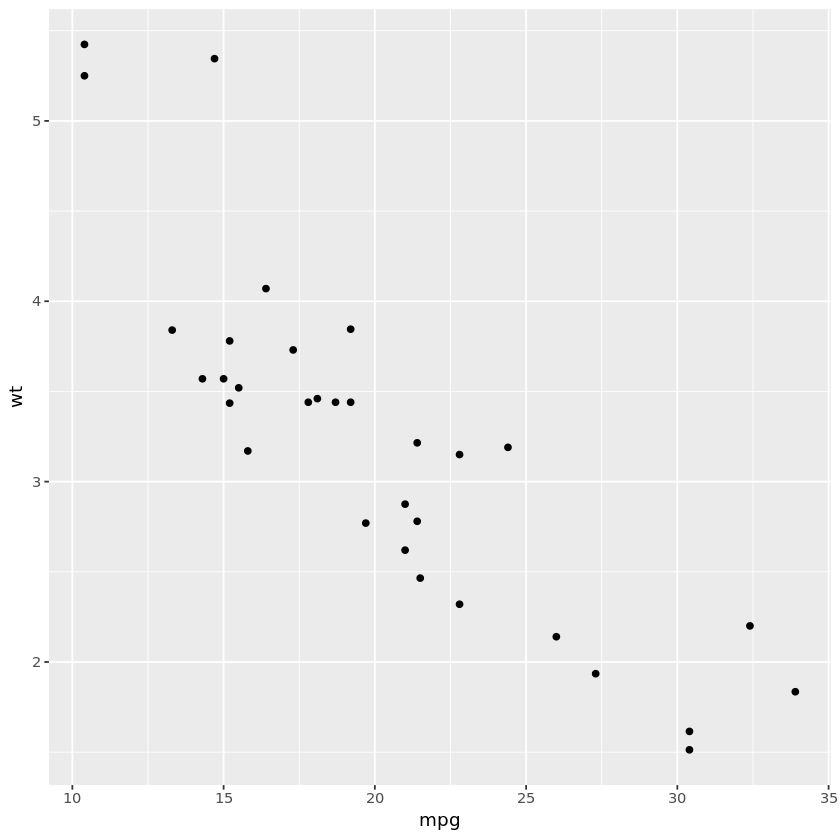

In [2]:
qplot(mpg, wt, data=mtcars)

We can create a similar graph using ggplot.

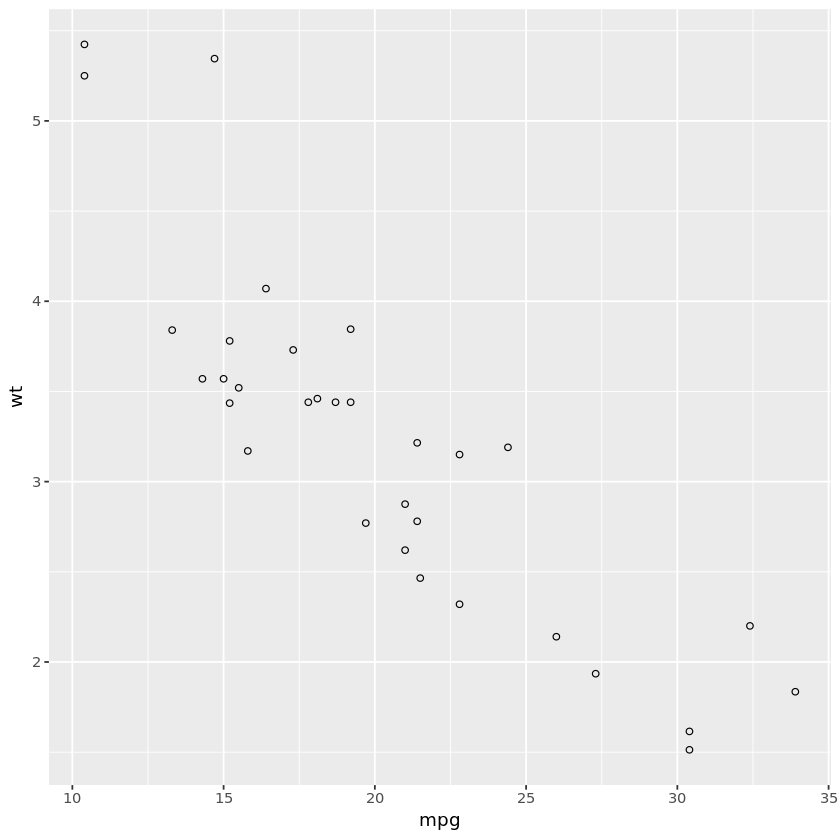

In [4]:
ggplot(mtcars, aes(x = mpg, y = wt)) + geom_point(shape=1)

You must have noticed that the shape of the circles changed. We can have solid circles modifying the `geom_point` parameter

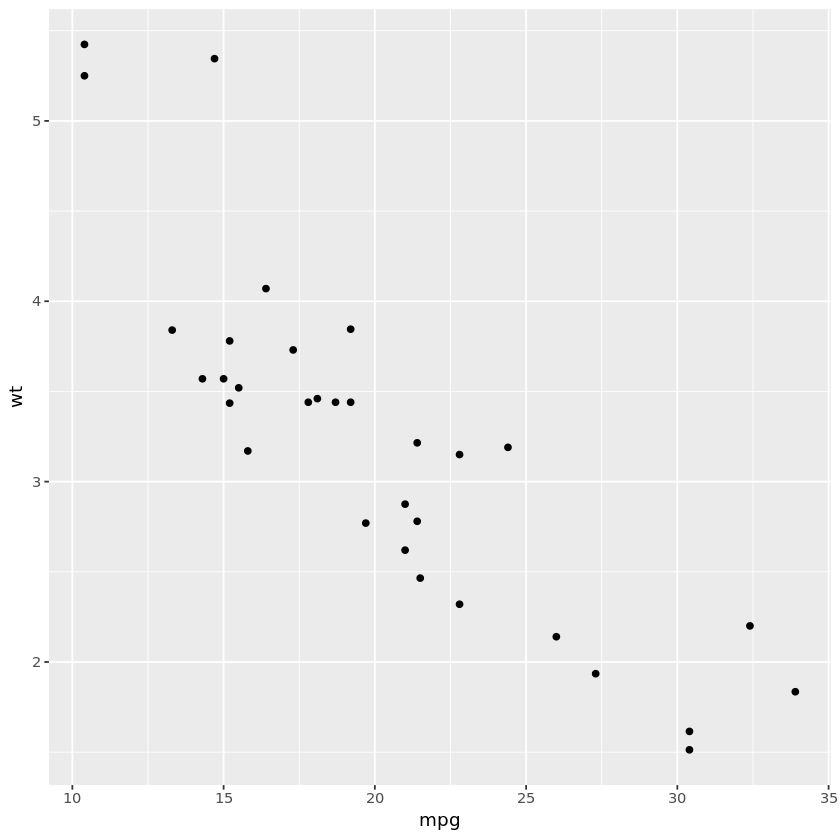

In [5]:
ggplot(mtcars,aes(x=mpg,y=wt)) + geom_point(shape=19)

As we can control the shapes, we can take advantage of this and plot three variables in a bidimensional scatter plot. You just need to pass the `shape` parameter as a column present in your dataset.

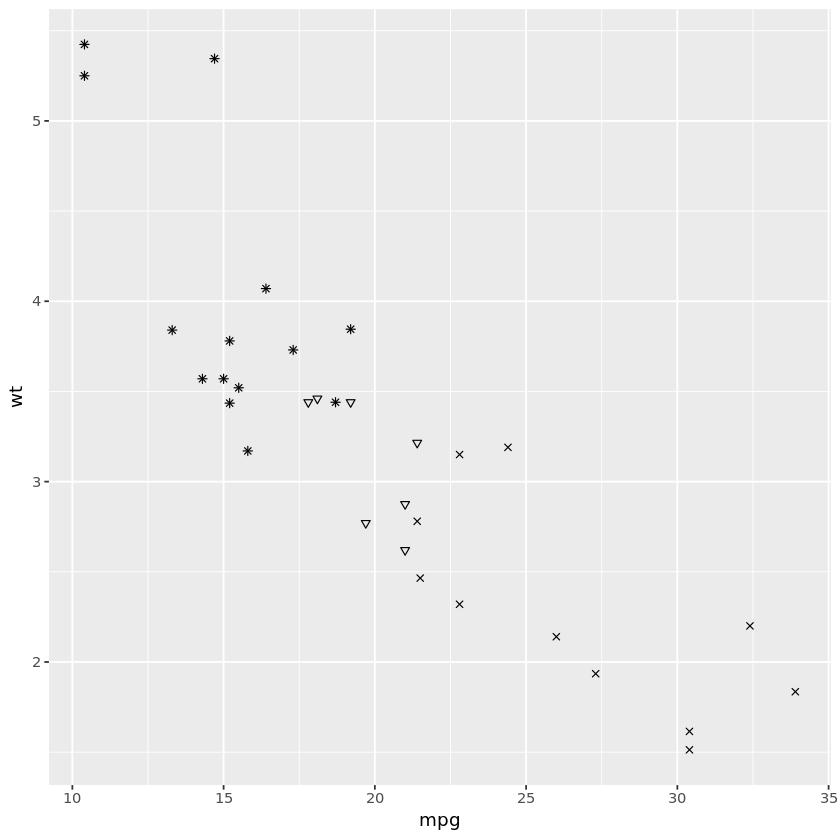

In [6]:
ggplot(mtcars,aes(x=mpg,y=wt,shape = cyl)) + geom_point() + scale_shape_identity()

It didn't work. That's because we need to have categorical data, instead of numerical. We can fix this creating factors for the cylinders.

In [7]:
mtcars$cylFactor<- factor(mtcars$cyl)

Now we just need to plot our graph again.

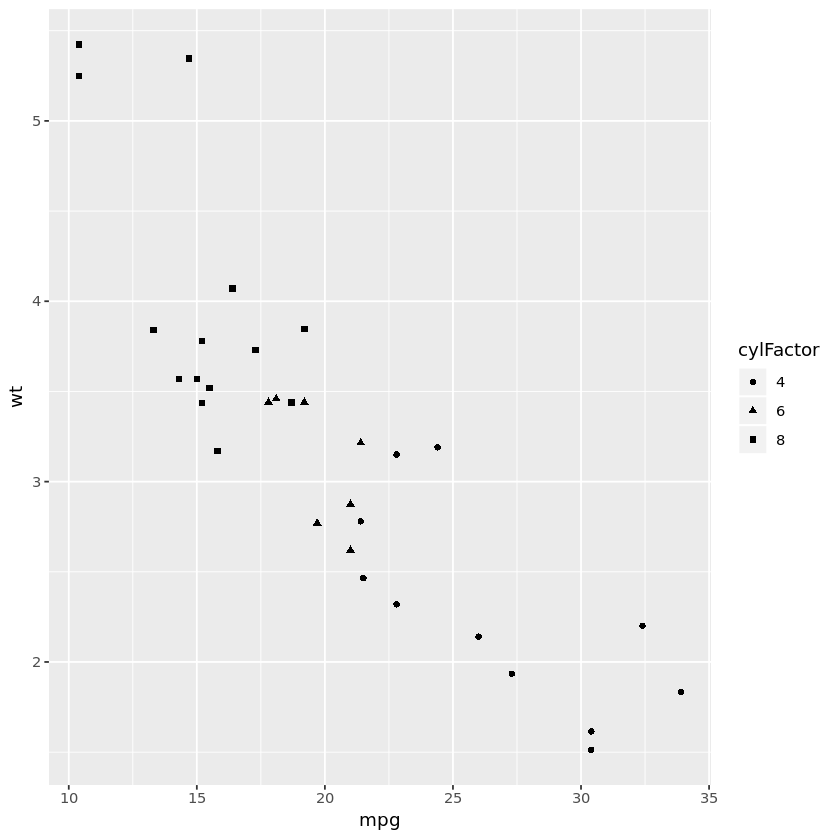

In [8]:
ggplot(mtcars,aes(x=mpg,y=wt,shape = cylFactor)) + geom_point()

We can change the colors of our circles using the `colour` parameter

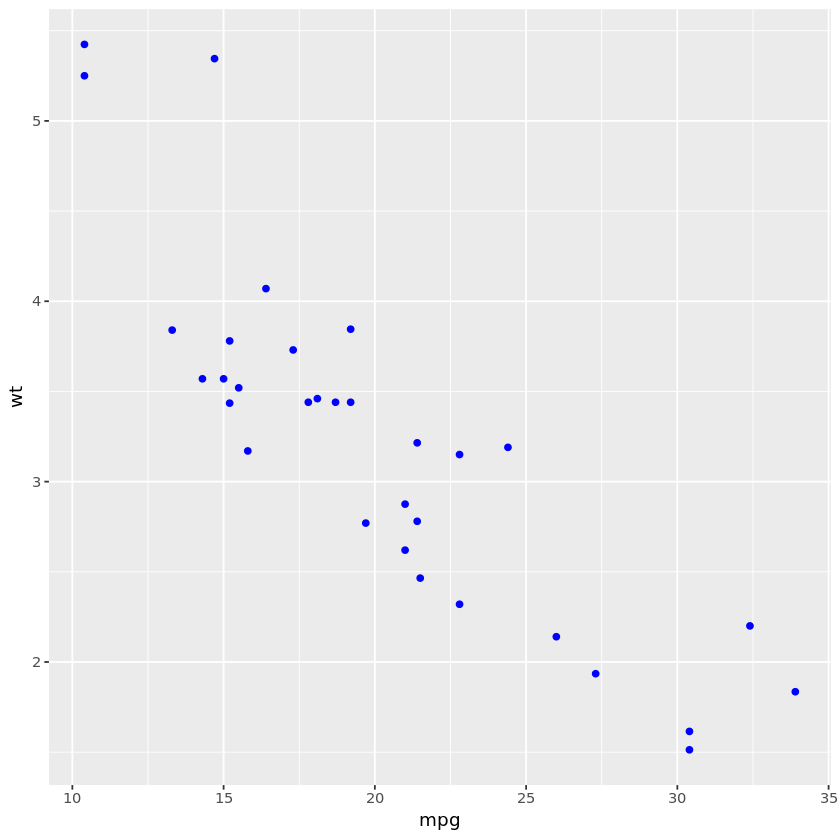

In [9]:
ggplot(mtcars,aes(x=mpg,y=wt)) + geom_point(shape=19, colour="blue")

As we did with the shapes, we can do the same thing with colours. Again, you just pass the `colour` parameter as a column present in your dataset.

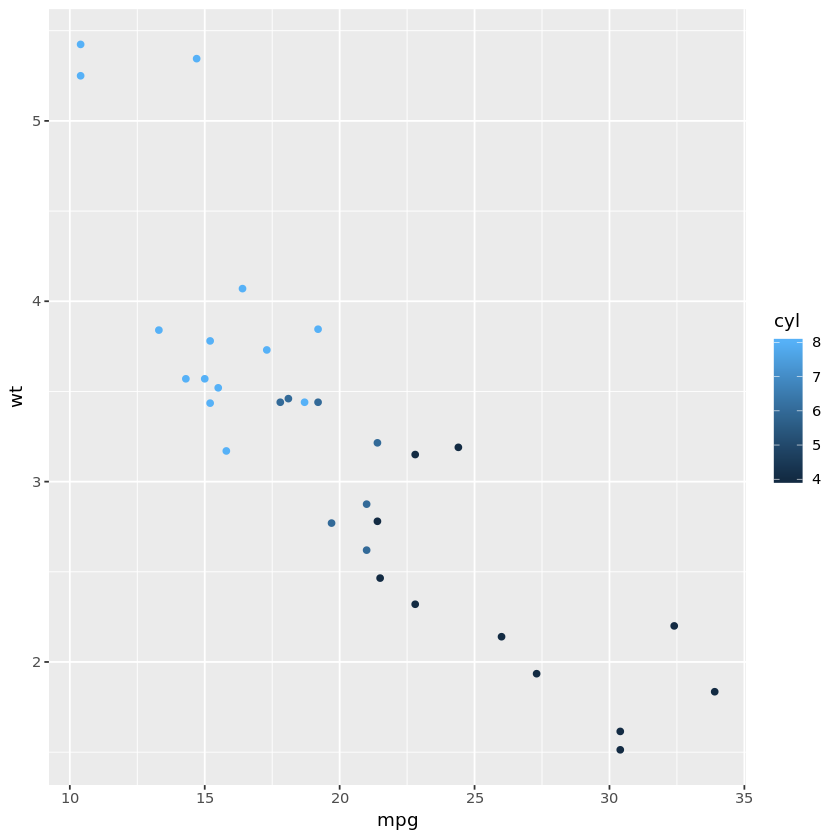

In [10]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cyl))+ geom_point(shape=19)

As the graph before used numerical data, it created the label with a gradient from 4 to 8. If we use categorical data, like the `cylFactors`, we can assign a unique color for every category.

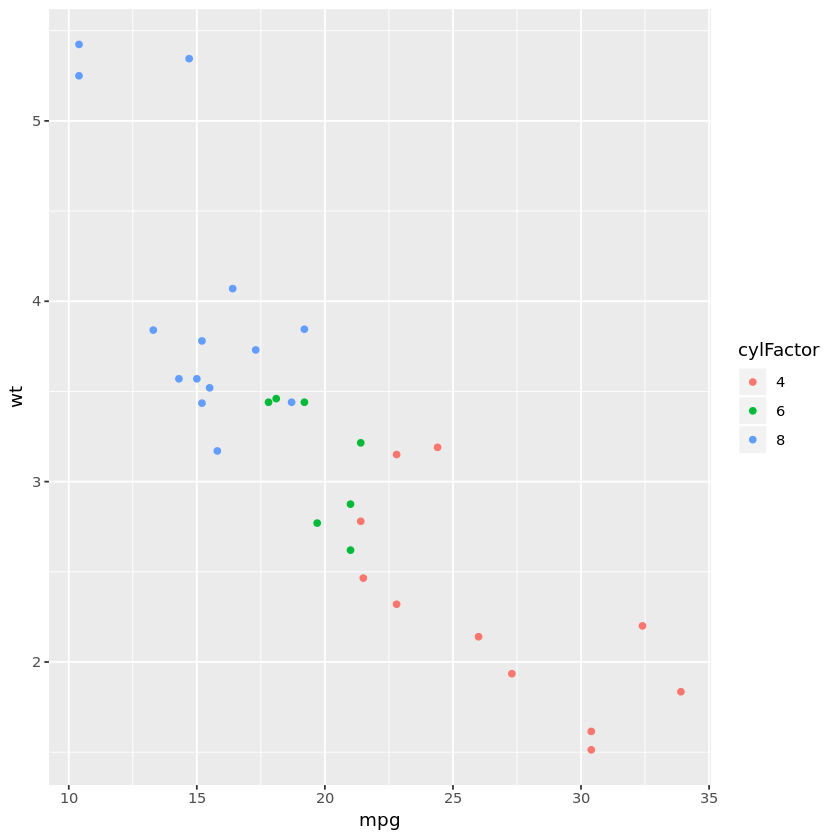

In [11]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19)

Now we need to rename our legend. Our users wouldn't understand what exactly is cylFactors.

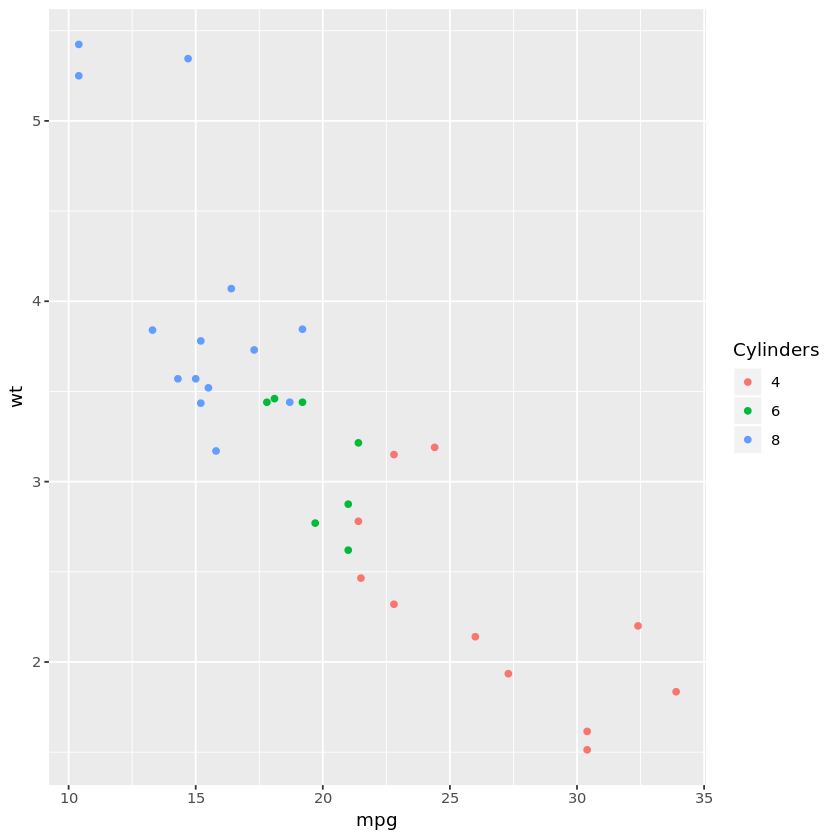

In [12]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + labs(colour = "Cylinders")

Just to finish our graph, we can rename and create the remaining labels.

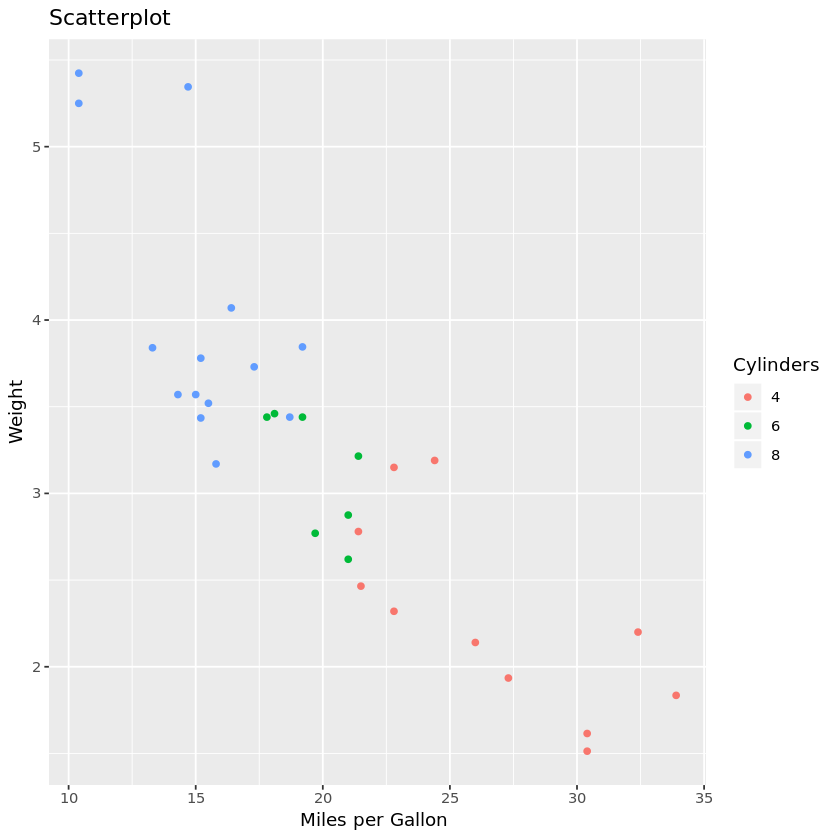

In [14]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + xlab("Miles per Gallon ") + ylab("Weight") +
  labs(colour = "Cylinders") + ggtitle("Scatterplot")

<hr>

<a id="ref2"></a>
<h2 align=center>Line Graph</h2>

Line graphs are also representations of data in which Cartesian coordinates are used. Much like scatterplots, the data is transformed into points - however, in line graphs, they are connected by lines, as the name implies.

<a id="ref3"></a>
<h3>Simple Line Graph</h3>

For line graphs, we are going to use the EuStockMarkets dataset. It is also a dataset that comes included with R and it describes four European Stock markets' historical data.

Let's start looking at their helpfile

In [15]:
?EuStockMarkets

EuStockMarkets {datasets},R Documentation


As we can see, it contains 1860 observations for each, and their filetype is `mts`, which stands for matrix.
`ggplot2` doesn't work with matrices.

To get around this limitation, we should create a dataframe from this matrix.
Thankfully, there's a function that does exactly what we need. It's the `as.data.frame()`.

In [16]:
EuStockDF <- as.data.frame(EuStockMarkets)

Now, let's check its head, to see how the data is structured.

In [17]:
head(EuStockDF)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


Now, let's start plotting!

Let's create a line graph of the "DAX" stock price:

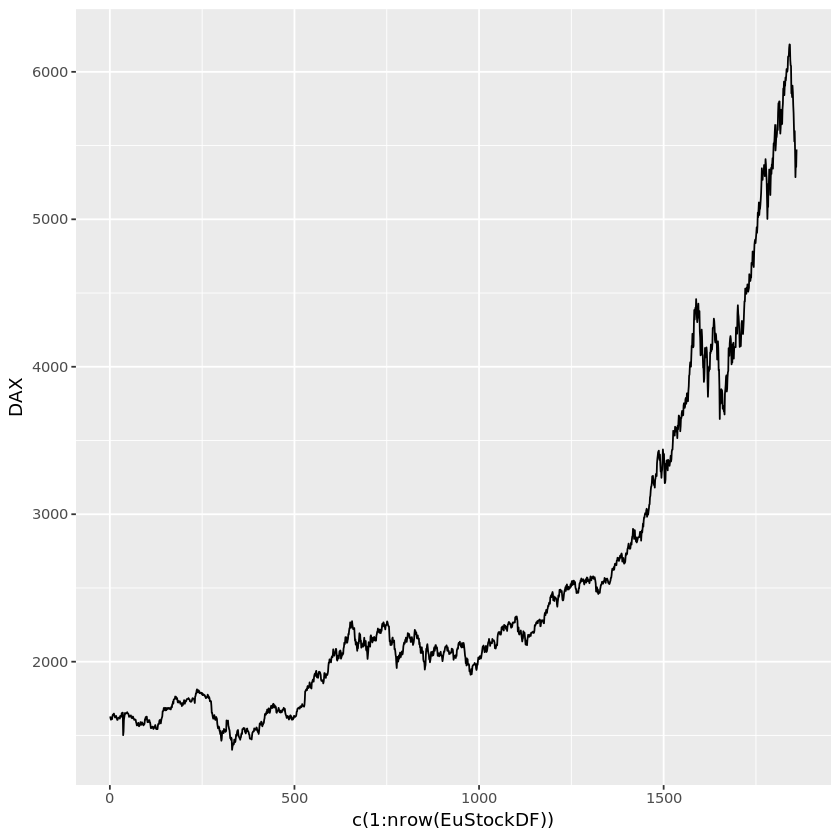

In [18]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line()

Let's increase the width of our line:

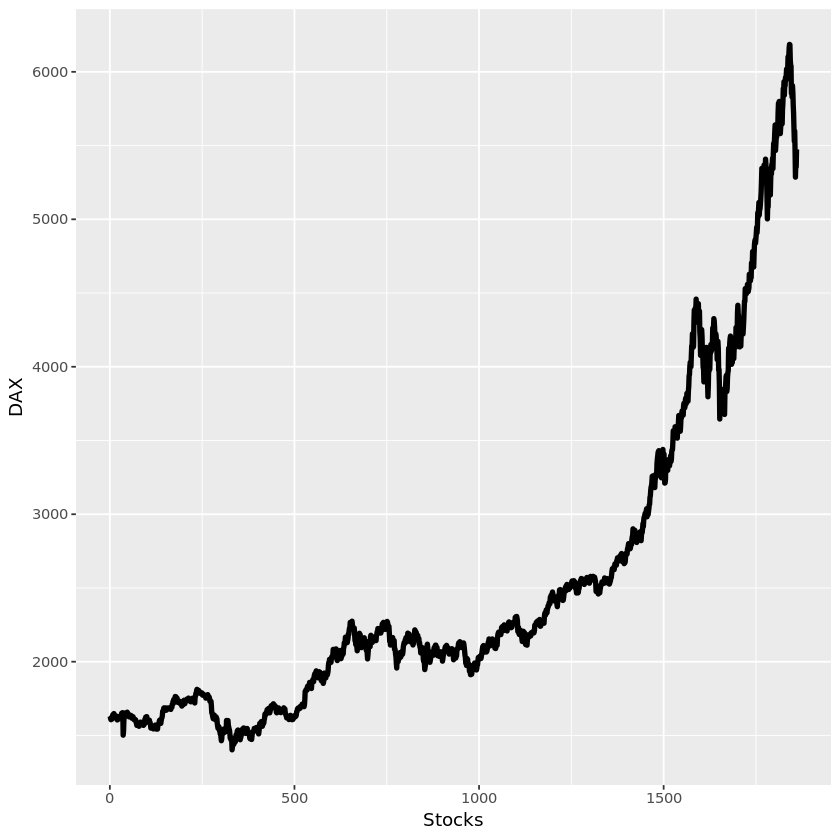

In [19]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line(size=1.5) + labs(x = "Stocks")

To change the colour, we can use the `colour` parameter.

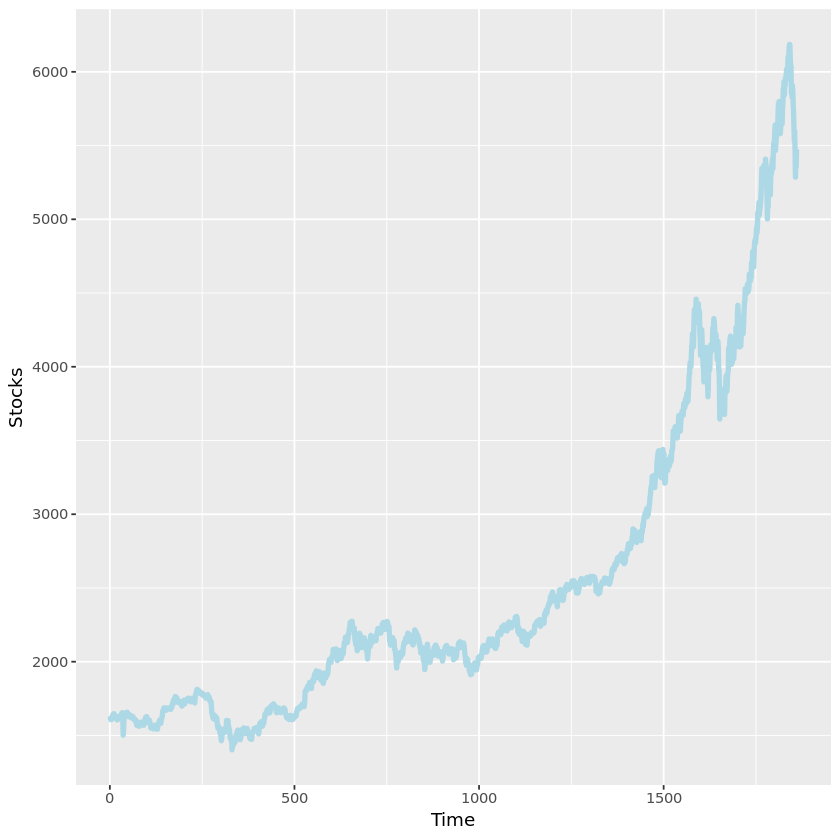

In [20]:
ggplot(EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX)) + geom_line(size=1.5, colour="light blue") + labs(x = "Time", y = "Stocks")

We can also plot more than one line at a time in the same graph.
Let's try plotting two stocks in the same graph.

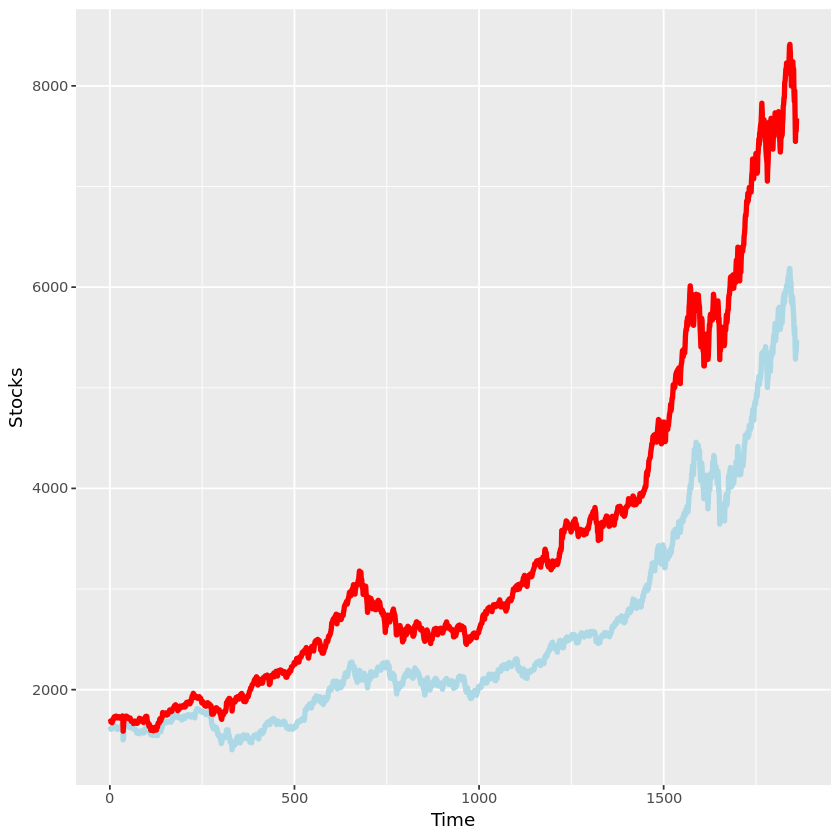

In [21]:
dax_smi_plot <- ggplot() +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX), size = 1.5, colour="light blue") +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = SMI), size = 1.5, colour = "red") +
  labs(x = "Time", y = "Stocks")
print(dax_smi_plot)

Now, let's plot all the stocks.

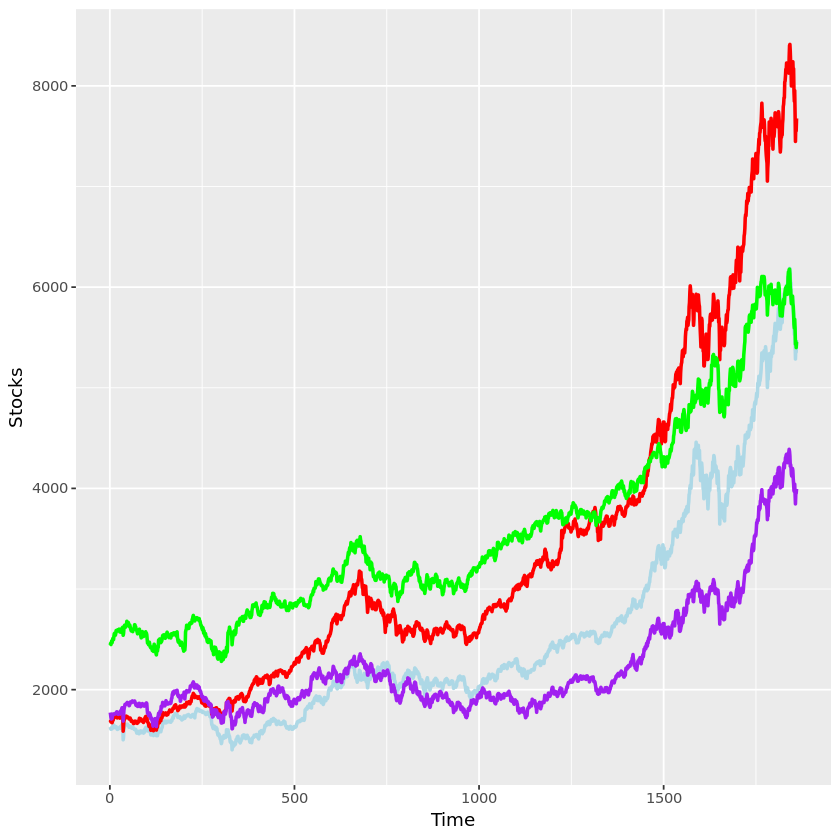

In [22]:
all_stocks <- ggplot() +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = DAX), size=1, colour="light blue") +
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = SMI), size =1, colour = "red") + 
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = CAC), size =1, colour = "purple") + 
  geom_line(data = EuStockDF,aes(x=c(1:nrow(EuStockDF)), y = FTSE), size =1, colour = "green") +
  labs(x = "Time", y = "Stocks")
print(all_stocks)

Let's change the labels in our graph.

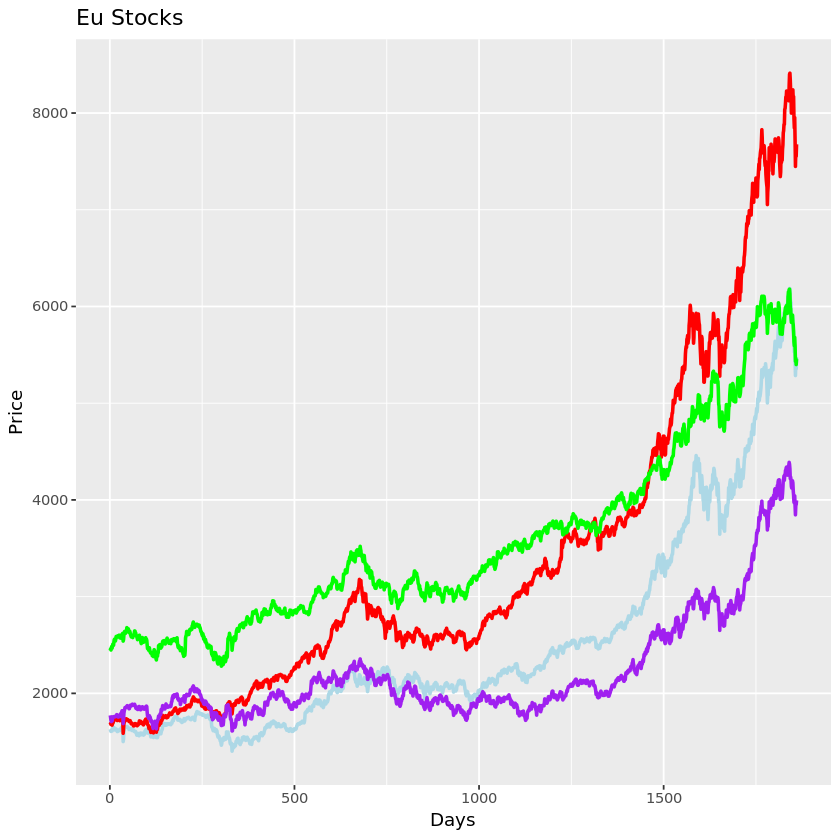

In [23]:
legend_stocks <- all_stocks + xlab("Days") + ylab("Price") + ggtitle("Eu Stocks")
print(legend_stocks)

<a id="ref4"></a>
<h3>Regression</h3>

Regression is a mathematical modelling concept in which a linear formula is created to simulate the percepted behaviour of the data points you create the model for. Regression is a great way to visualize trends and to create basic predictions.

Predictions are made on one set of variables, given another set of variables. Trends are usually extracted from the relation between two sets of variables.  In this example, we will be checking if there is any relation between the weight and miles per gallon of a car.

To visualize regression, we can trace our fit line onto our graphs. Let's use the same example from the previous section and draw our regression line on top of it.

The first method that we will utilize is linear regression, which is regression that utilizes what we call a linear model. To do so, we pass the `lm` parameter to the `method` attribute of the `geom_smooth` function, like so:

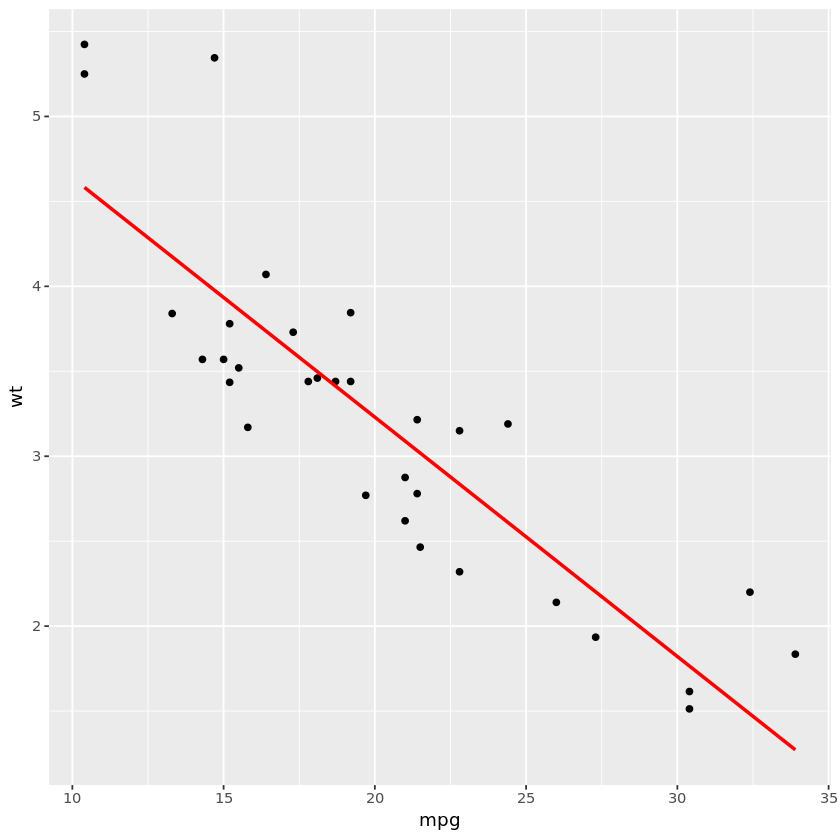

In [24]:
ggplot(mtcars,aes(x=mpg,y=wt))  + geom_point(shape=19) +
  geom_smooth(method="lm", se= FALSE, color = "red")

You might have noticed that our code has `se = FALSE` on it. `se` represents what we call the "confidence interval" of our model. Confidence intervals are a lower and higher bound in which we can have 95% certainty that a data point will be in.

If you want to display this interval, you can either just ignore the `se` attribute, or set it to `TRUE`.

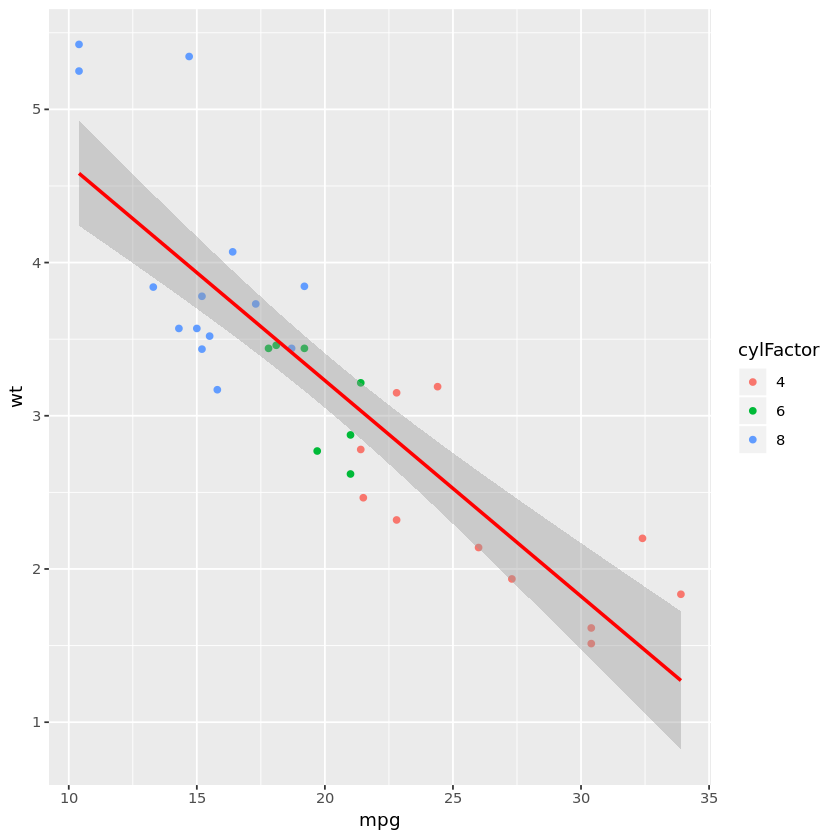

In [25]:
#se = TRUE  -> confidence interval appear (default = true)
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + geom_smooth(method="lm", se= TRUE, color = "red")

As with the other graphs, we can add labels to our linear regression graphs:

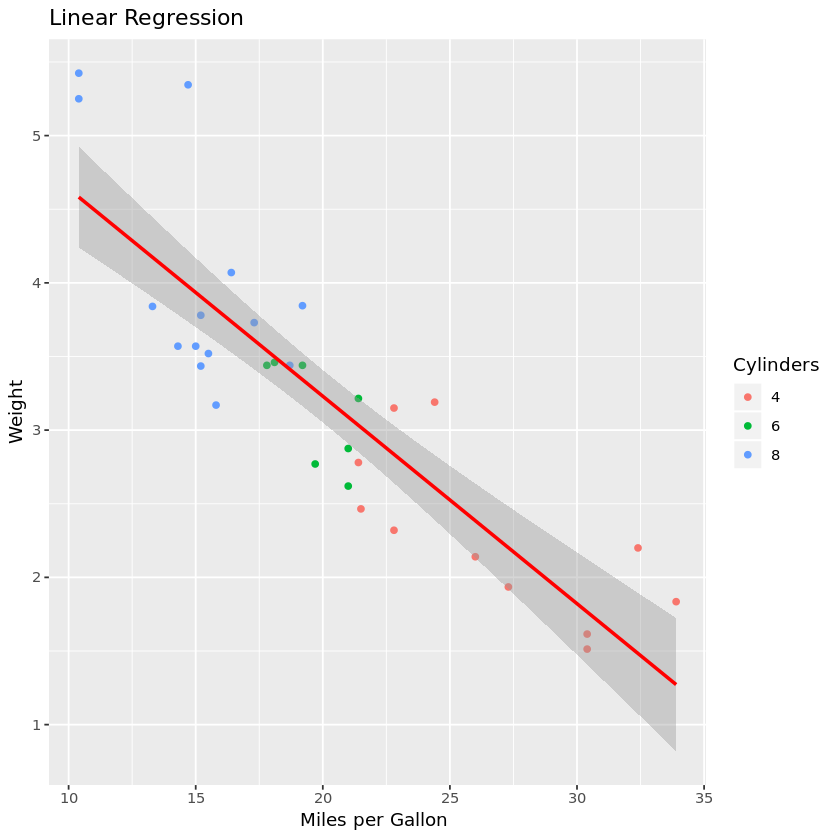

In [26]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + 
  geom_smooth(method="lm", se= TRUE, color = "red") + xlab("Miles per Gallon ") + 
  ylab("Weight") +  labs(colour = "Cylinders") + ggtitle("Linear Regression")

Another type of regression utilizes the Gaussian model. Instead of a straight line, the Gaussian model fits a (possibly not straight) curve. To use the Gaussian model, we pass the `auto` parameter to the `method` attribute

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


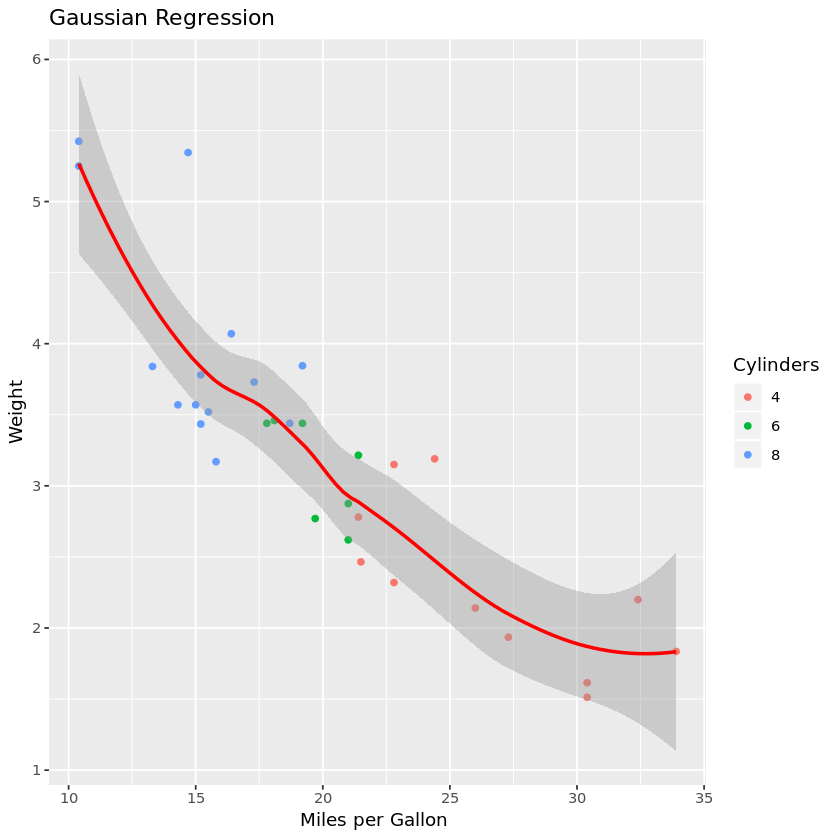

In [27]:
ggplot(mtcars,aes(x=mpg,y=wt,color = cylFactor)) + geom_point(shape=19) + 
  geom_smooth(method="auto", se= TRUE, color = "red") + xlab("Miles per Gallon ") + 
  ylab("Weight") +  labs(colour = "Cylinders") + ggtitle("Gaussian Regression")

<hr>

### About the Author:  
Hi! It's [Francisco Magioli](https://www.linkedin.com/in/franciscomagioli) and [Erich Natsubori Sato](https://www.linkedin.com/in/erich-natsubori-sato), the authors of this notebook. We hope you found R easy to learn! There's lots more to learn about R but you're well on your way. Feel free to connect with us if you have any questions.

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).